In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

### Sinusoidal Functions

A sinusoidal function, often represented as $f(t)$, is a fundamental mathematical model used to describe periodic phenomena. It is defined by the equation:

$$f(t) = A \sin(\omega t + \phi)$$

Where:
- $A$: Amplitude, which represents the peak value of the function.
- $\omega$: Angular frequency, a measure of how quickly the function oscillates.
- $\phi$: Phase shift, indicating the horizontal displacement of the waveform.

In the context of sinusoidal functions, some important definitions include:

- $T$: Period, representing the time it takes for one complete cycle to occur.
- $\mu = \frac{1}{T}$: Frequency, measured in Hertz (Hz), which denotes how many cycles occur in one second.

The angular frequency, $\omega$, is related to the period, $T$, and the frequency, $\mu$, as follows:

$$\omega = 2\pi\mu = \frac{2\pi}{T}$$

This relationship allows you to express the sinusoidal function in terms of frequency and period:

$$f(t) = A \sin\left(\frac{2\pi}{T}t + \phi\right)$$

In this form, you can readily adjust the characteristics of the sinusoidal waveform based on its frequency, period, amplitude, and phase shift. Sinusoidal functions are widely used in various fields to model periodic behavior, such as in physics, engineering, and signal processing.


Example: Frequency $\mu=5$ Hz

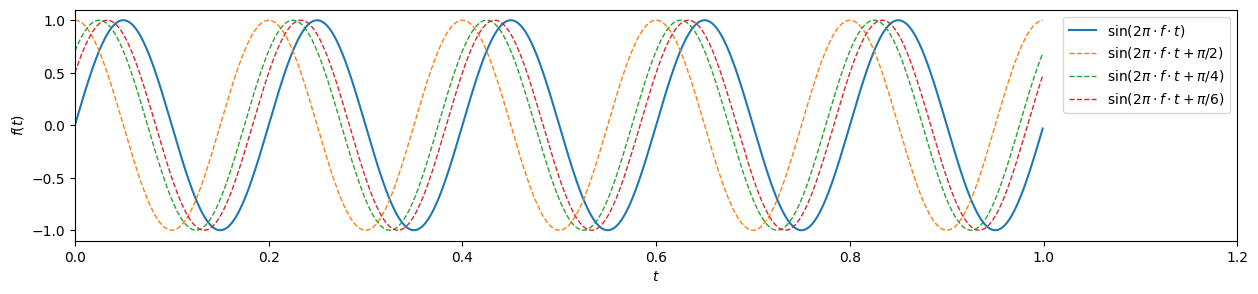

In [3]:
plt.figure(figsize=(15, 3))

N = 1000  # sample points
freq = 5  # signal frequency (inverse of period)
t = np.linspace(0.0, 1.0, N, endpoint=False)
f_t = np.sin(2 * np.pi * freq * t)
plt.plot(t, f_t, label=f"$\sin(2\pi \cdot f \cdot t)$")

for factor in [2, 4, 6]:
   f_t = np.sin(2 * np.pi * freq * t + np.pi / factor)
   plt.plot(t, f_t, "--", linewidth=1, label=f"$\sin(2\pi \cdot f \cdot t + \pi/{factor})$")
# plt.title("$f(t) = sin(2 \pi f t)$")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.xlim([0, 1.2])
plt.legend()
plt.show()

### Complex Numbers

A complex number, often represented as $C$, is composed of two parts: a real part, denoted as $a$, and an imaginary part, denoted as $b$. Mathematically, it is expressed as:

$C = a + bj$

Complex numbers can also be represented in polar form, which involves their magnitude ($|C|$) and argument ($\theta$). The magnitude of a complex number is found using the Pythagorean theorem and is given by:

$|C| = \sqrt{a^2 + b^2}$

The argument, $\theta$, is the angle that the complex number makes with the positive real axis and can be found using the arctangent function:

$\theta = \arctan\left(\frac{b}{a}\right)$

So, a complex number $C$ can be expressed in polar form as:

$C = |C|e^{j\theta}$

Here, $j$ represents the imaginary unit.


Example: $C = 2 + 2j$  

In [4]:
C = 2 + 2j
a = C.real
b = C.imag
C_mag = np.sqrt(a**2 + b**2)
theta = np.arctan2(b, a)
print(C_mag * np.exp(1j * theta))

(2.0000000000000004+2j)


### Complex Sinusoidal Functions

A complex sinusoidal function, denoted as $C(t)$, is a mathematical representation of a harmonic oscillation that can be expressed in polar form. It is defined by the equation:

$$C(t) = |C(t)| e^{j \frac{2\pi t}{T}}$$

Where:
- $|C(t)|$: Instantaneous magnitude, which represents the amplitude of the complex sinusoidal at a given time $t$.
- $j$: The imaginary unit, used to denote the imaginary part of the complex sinusoidal.
- $\frac{2\pi}{T}$: Angular frequency, which determines the rate of oscillation.
- $t$: Time, representing the independent variable that specifies the time at which the complex sinusoidal is evaluated.
- $T$: Period, indicating the time it takes for one complete cycle of the complex sinusoidal.


Example: Frequency $\mu=5$ Hz (Period $T = 1/5=0.2$)

In [5]:
y = np.exp(2j * np.pi * freq * t)
print(y[:10])

[1.        +0.j         0.99950656+0.03141076j 0.99802673+0.06279052j
 0.99556196+0.09410831j 0.9921147 +0.12533323j 0.98768834+0.15643447j
 0.98228725+0.18738131j 0.97591676+0.21814324j 0.96858316+0.24868989j
 0.96029369+0.27899111j]


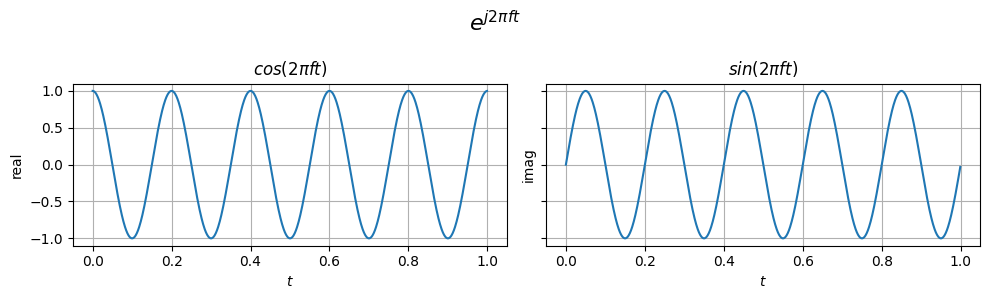

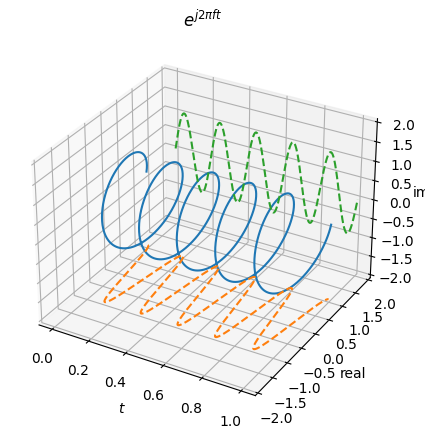

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# real x t
y = np.exp(2j * np.pi * freq * t)
axs[0].plot(t, y.real)
axs[0].set_title("$cos(2 \pi f t)$")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("real")
axs[0].grid(True)

# imag x t
axs[1].plot(t, y.imag)
axs[1].set_title("$sin(2 \pi f t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("imag")
axs[1].grid(True)
plt.suptitle("$e^{j 2 \pi f t}$", fontsize=16)
plt.tight_layout()
plt.show()

# real x imag x t
fig, ax = plt.subplots(1, 1, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax.plot(t, y.real, zs=y.imag, zdir="z")
ax.plot(t, y.real, zs=-2, zdir="z", linestyle="dashed")
ax.plot(t, 2 * np.ones_like(t), zs=y.imag, zdir="z", linestyle="dashed")
ax.set_xlabel("$t$")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$e^{j 2 \pi f t}$")
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
plt.show()

### Shifting the complex sinusoidal

$$C_{\text{shift}}(t) = C_i + C(t)$$

- $C_1 = 2e^{j\cdot0} = 2 + 0j = 2$
- $C_2 = 2e^{j\frac{\pi}{2}} = 0 + 2j = 2j$
- $C_3 = 2\sqrt{2}e^{j\frac{\pi}{4}} = 2 + 2j$

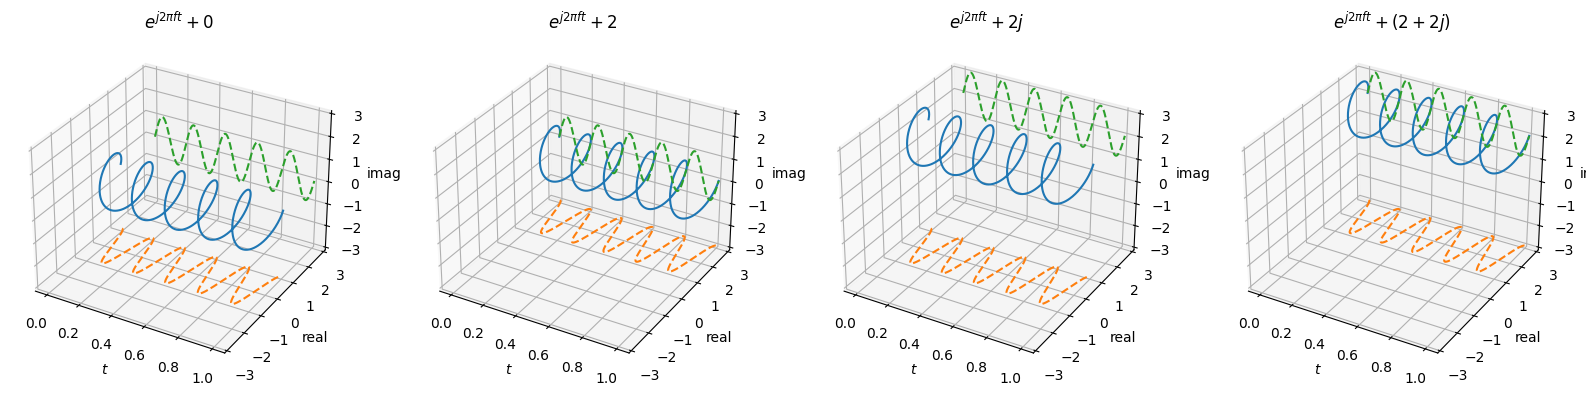

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": "3d"})

C1 = 2
C2 = 2j
C3 = 2 + 2j

for i, C in enumerate([0, C1, C2, C3]):
    y_shifted = y + C
    axs[i].plot(t, y_shifted.real, zs=y_shifted.imag, zdir="z")
    axs[i].plot(t, y_shifted.real, zs=-3, zdir="z", linestyle="dashed")
    axs[i].plot(t, 3 * np.ones_like(t), zs=y_shifted.imag, zdir="z", linestyle="dashed")
    axs[i].set_xlabel("$t$")
    axs[i].set_ylabel("real")
    axs[i].set_zlabel("imag")
    axs[i].set_title(f"$e^{{j 2 \pi f t}} + {str(C)}$")
    axs[i].set_ylim((-3, 3))
    axs[i].set_zlim((-3, 3))
plt.show()

### Scaling the Complex Sinusoidal

Scaling a complex sinusoidal function, denoted as $C_{\text{scale}}(t)$, involves multiplying it by a complex scaling factor, $C_i$. The scaled complex sinusoidal can be expressed as:

$$C_{\text{scale}}(t) = C_i \cdot C(t)$$

Where:
- $C_i$: Complex scaling factor, representing a complex number that modifies the magnitude and phase of the complex sinusoidal.
- $C(t)$: The original complex sinusoidal function defined as $|C(t)|e^{j\frac{2\pi t}{T}}$, where $|C(t)|$ is the instantaneous magnitude and $\frac{2\pi}{T}$ is the angular frequency.

By multiplying $C(t)$ by the complex scaling factor $C_i$, you can effectively scale the amplitude and phase of the complex sinusoidal. The scaling factor $C_i$ is itself a complex number, consisting of a magnitude and a phase. The magnitude of $C_i$ determines how much the amplitude of the complex sinusoidal is scaled, while the phase of $C_i$ modifies the phase of the sinusoidal function.

Here are some examples of complex scaling factors:
- $C_1 = e^{j\cdot0} = 1 + 0j = 1$: This factor has a magnitude of 1 and no phase shift, resulting in no scaling of the complex sinusoidal.
- $C_2 = 2e^{j\cdot0} = 2 + 0j = 2$: This factor scales the amplitude by a factor of 2, with no phase shift.
- $C_3 = 2e^{j\frac{\pi}{2}} = 0 + 2j = 2j$: This factor has a magnitude of 2 and introduces a phase shift of $\frac{\pi}{2}$, resulting in a scaling of the amplitude and a phase shift of 90 degrees.
- $C_4 = 2\sqrt{2}e^{j\frac{\pi}{4}} = 2 + 2j$: This factor combines a magnitude of $2\sqrt{2}$ and a phase shift of $\frac{\pi}{4}$, scaling the amplitude and introducing a phase shift.

Scaling the complex sinusoidal using these complex scaling factors allows you to manipulate the properties of the sinusoidal waveform, making it a versatile tool in various applications, including signal processing and communication.


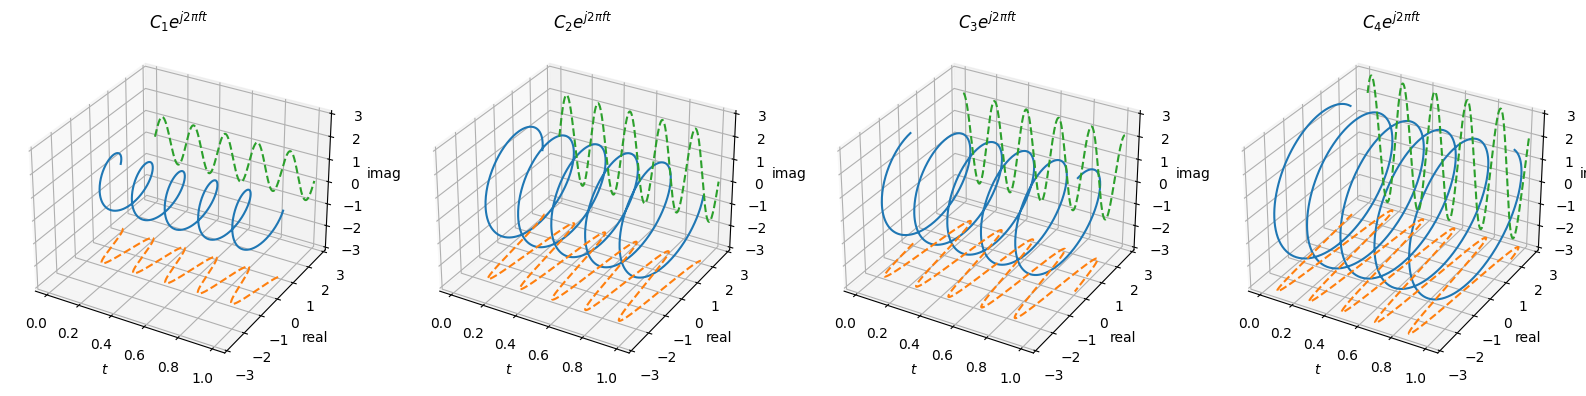

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": "3d"})
C1 = 1
C2 = 2
C3 = 2j
C4 = 2 + 2j
for i, C in enumerate([C1, C2, C3, C4]):
    y_scaled = C * y
    amp = np.abs(C)
    axs[i].plot(t, y_scaled.real, zs=y_scaled.imag, zdir="z")
    axs[i].plot(t, y_scaled.real, zs=-3, zdir="z", linestyle="dashed")
    axs[i].plot(t, 3 * np.ones_like(t), zs=y_scaled.imag, zdir="z", linestyle="dashed")
    axs[i].set_xlabel("$t$")
    axs[i].set_ylabel("real")
    axs[i].set_zlabel("imag")
    axs[i].set_title(f"$C_{i+1} e^{{j 2 \pi f t}}$")
    axs[i].set_ylim((-3, 3))
    axs[i].set_zlim((-3, 3))
plt.show()

### FFT

In [9]:
F_u = np.fft.fft(f_x)
freqs = np.fft.fftfreq(x.size, x[1] - x[0])
amp = np.abs(F_u)
plt.bar(freqs[: N // 2], amp[: N // 2], width=2)  # plot the positive frequencies
plt.title("Amplitude")
plt.show()

NameError: name 'f_x' is not defined

In practice, the sin contribution (imaginary part) is almost neglectable comparing to cos (real). This indicating no phase shift in the original domain.

In [ ]:
F_u[amp > 1]
freqs[amp > 1]

array([ 5., -5.])

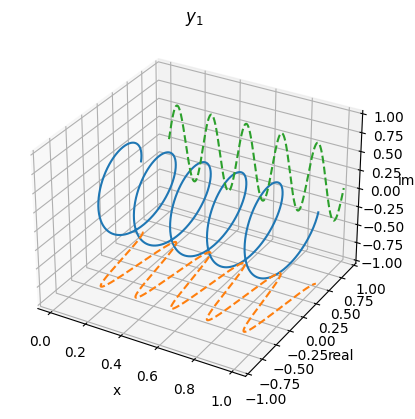

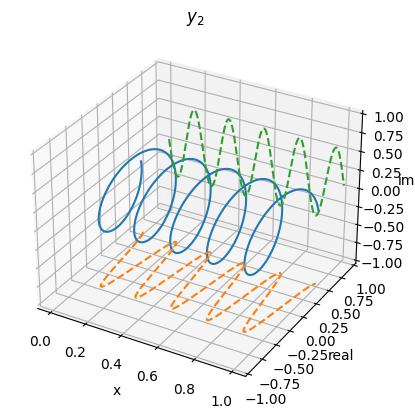

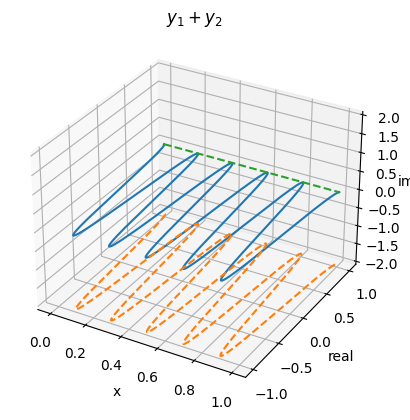

In [ ]:
F_u = np.fft.fft(f_x)
amp = np.abs(F_u)
y1 = F_u[amp > 1][0] * np.exp(2j * np.pi * k * x) / N
y2 = F_u[amp > 1][1] * np.exp(2j * np.pi * (-k) * x) / N
y3 = y1 + y2

ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y1.real, zs=y1.imag, zdir="z")
ax.plot(x, y1.real, zs=-1, zdir="z", linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y1.imag, zdir="z", linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_1$")
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
plt.show()


ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y2.real, zs=y2.imag, zdir="z")
ax.plot(x, y2.real, zs=-1, zdir="z", linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y2.imag, zdir="z", linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_2$")
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
plt.show()

ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y3.real, zs=y3.imag, zdir="z")
ax.plot(x, y3.real, zs=-2, zdir="z", linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y3.imag, zdir="z", linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_1 + y_2$")
# ax.set_ylim((-400, 400))
ax.set_zlim((-2, 2))
plt.show()

In [ ]:
Note ac

array([ 5.00000000e+02-1.20087899e-13j,  4.99753280e+02+1.57053795e+01j,
        4.99013364e+02+3.13952598e+01j,  4.97780982e+02+4.70541567e+01j,
        4.96057351e+02+6.26666168e+01j,  4.93844170e+02+7.82172325e+01j,
        4.91143625e+02+9.36906573e+01j,  4.87958381e+02+1.09071621e+02j,
        4.84291581e+02+1.24344944e+02j,  4.80146843e+02+1.39495553e+02j,
        4.75528258e+02+1.54508497e+02j,  4.70440384e+02+1.69368960e+02j,
        4.64888243e+02+1.84062276e+02j,  4.58877313e+02+1.98573945e+02j,
        4.52413526e+02+2.12889646e+02j,  4.45503262e+02+2.26995250e+02j,
        4.38153340e+02+2.40876837e+02j,  4.30371014e+02+2.54520708e+02j,
        4.22163963e+02+2.67913397e+02j,  4.13540287e+02+2.81041689e+02j,
        4.04508497e+02+2.93892626e+02j,  3.95077506e+02+3.06453527e+02j,
        3.85256621e+02+3.18711995e+02j,  3.75055535e+02+3.30655933e+02j,
        3.64484314e+02+3.42273553e+02j,  3.53553391e+02+3.53553391e+02j,
        3.42273553e+02+3.64484314e+02j,  3.30655933